In [1]:
import pandas as pd
import ast
from tqdm import tqdm
from sunburst_utils import *
import plotly.express as px

from IPython.display import Image

In [2]:
df = pd.read_csv("../01_data/preprocessedData/random_train_question.csv")

In [3]:
df["question_token"] = [ast.literal_eval(liste) for liste in df["question_token"]]
df["question_pos"] = [ast.literal_eval(liste) for liste in df["question_pos"]]
df["question_tag"] = [ast.literal_eval(liste) for liste in df["question_tag"]]
df["last_token"] = [question[-1] for question in df["question_token"]]

In [4]:
df.head()

,Unnamed: 0,text_title,paragraph_text,question_id,question_text,question_token,question_pos,question_tag,question_parse_tree,correct_answer_text,...,correct_masked_answer_sentence_token,plausible_answer_text,plausible_answer_sentence,plausible_answer_sentences_token,plausible_answer_char_index,plausible_answer_token_index,plausible_masked_answer_text_token,plausible_masked_answer_sentence_token,paragraph_tokens,last_token
0,0,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56be85543aeaaa14008c9063,When did Beyonce start becoming popular?,"[When, did, Beyonce, start, becoming, popular, ?]","[ADV, AUX, PROPN, VERB, VERB, ADJ, PUNCT]","[WRB, VBD, NNP, VB, VBG, JJ, .]",(ROOT\n (SBARQ\n (WHADVP (WRB When))\n ...,['in the late 1990s'],...,"[['born', 'and', 'raised', 'in', 'houston', ',...",[],[],[],[],[],[],[],"['Beyoncé', 'Giselle', 'Knowles', '-', 'Carter...",?
1,1,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56be85543aeaaa14008c9065,What areas did Beyonce compete in when she was...,"[What, areas, did, Beyonce, compete, in, when,...","[DET, NOUN, AUX, PROPN, VERB, ADP, ADV, PRON, ...","[WDT, NNS, VBD, NNP, VB, RP, WRB, PRP, VBD, VB...",(ROOT\n (FRAG\n (SBAR\n (WHNP (WDT Wh...,['singing and dancing'],...,"[['born', 'and', 'raised', 'in', 'houston', ',...",[],[],[],[],[],[],[],"['Beyoncé', 'Giselle', 'Knowles', '-', 'Carter...",?
2,2,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56be85543aeaaa14008c9066,When did Beyonce leave Destiny's Child and bec...,"[When, did, Beyonce, leave, Destiny, 's, Child...","[ADV, AUX, PROPN, VERB, PROPN, PART, PROPN, CC...","[WRB, VBD, NNP, VB, NNP, POS, NNP, CC, VB, DT,...",(ROOT\n (SBARQ\n (WHADVP (WRB When))\n ...,['2003'],...,"[['their', 'hiatus', 'saw', 'the', 'release', ...",[],[],[],[],[],[],[],"['Beyoncé', 'Giselle', 'Knowles', '-', 'Carter...",?
3,3,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56bf6b0f3aeaaa14008c9601,In what city and state did Beyonce grow up?,"[In, what, city, and, state, did, Beyonce, , ...","[ADP, PRON, NOUN, CCONJ, NOUN, AUX, PROPN, SPA...","[IN, WP, NN, CC, NN, VBD, NNP, _SP, VB, RP, .]",(ROOT\n (SBARQ\n (WHPP\n (IN In)\n ...,"['Houston, Texas']",...,"[['born', 'and', 'raised', 'in', '<<Answer>>',...",[],[],[],[],[],[],[],"['Beyoncé', 'Giselle', 'Knowles', '-', 'Carter...",?
4,4,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56bf6b0f3aeaaa14008c9602,In which decade did Beyonce become famous?,"[In, which, decade, did, Beyonce, become, famo...","[ADP, DET, NOUN, AUX, PROPN, VERB, ADJ, PUNCT]","[IN, WDT, NN, VBD, NNP, VB, JJ, .]",(ROOT\n (SBARQ\n (WHPP (IN In) (WHNP (WDT ...,['late 1990s'],...,"[['born', 'and', 'raised', 'in', 'houston', ',...",[],[],[],[],[],[],[],"['Beyoncé', 'Giselle', 'Knowles', '-', 'Carter...",?


In [5]:
last_tag = []
last_pos = []
last_token = []

last_tag2 = []
last_pos2 = []
last_token2 = []

for i, row in tqdm(df.iterrows()):
    last_tag2.append(row["question_tag"][-2])
    last_pos2.append(row["question_pos"][-2])
    last_token2.append(row["question_token"][-2])
    
    last_tag.append(row["question_tag"][-1])
    last_pos.append(row["question_pos"][-1])
    last_token.append(row["question_token"][-1])

81971it [00:16, 4937.99it/s]


In [6]:
df["last_tag"] = last_tag
df["last_pos"] = last_pos
df["last_token"] = last_token

df["second_last_tag"] = last_tag2
df["second_last_pos"] = last_pos2
df["second_last_token"] = last_token2

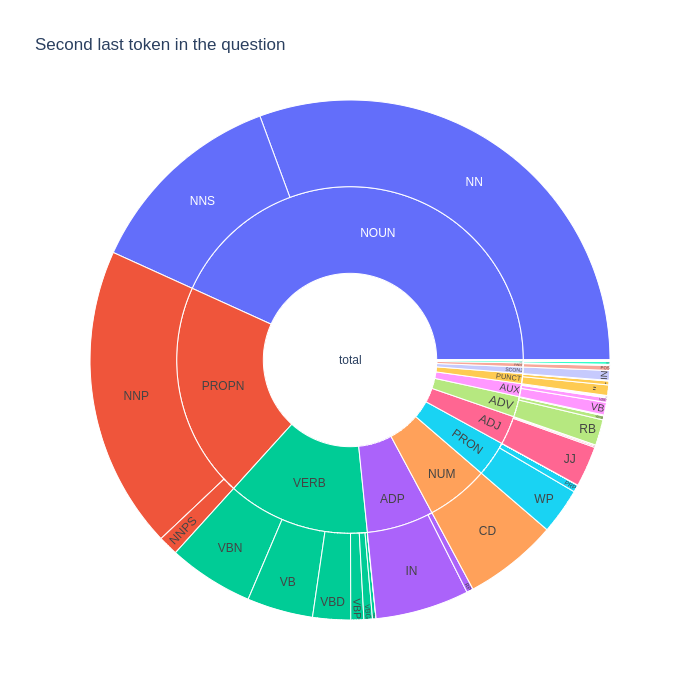

In [7]:
levels = ["second_last_token", "second_last_tag", "second_last_pos"] # levels used for the hierarchical chart
color_columns = 'count'
value_column = 'count'
df_all_trees = build_hierarchical_dataframe(df, levels, value_column, color_columns)

fig =px.sunburst(
    #df_all_trees.loc[[id_.endswith("#NOUN") for id_ in df_all_trees["id"]]],
    df_all_trees,
    names='name',
    ids='id',
    parents='parent',
    values='value',
    branchvalues='total',
    height=700,
    title="Second last token in the question",
    maxdepth=3
)

filename="images/questions/sunburst_second_last_token.png"
fig.write_image(filename)
Image(filename)

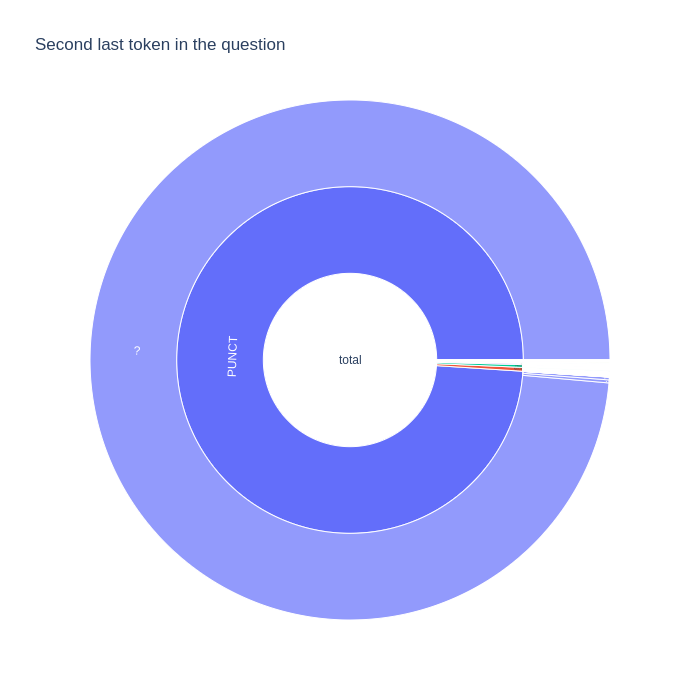

In [16]:
levels = ["last_token", "last_pos"] # levels used for the hierarchical chart
color_columns = 'count'
value_column = 'count'
df_all_trees = build_hierarchical_dataframe(df, levels, value_column, color_columns)

fig =px.sunburst(
    #df_all_trees.loc[[id_.endswith("#NOUN") for id_ in df_all_trees["id"]]],
    df_all_trees,
    names='name',
    ids='id',
    parents='parent',
    values='value',
    branchvalues='total',
    height=700,
    title="Last token in the question",
    maxdepth=3
)

filename="images/questions/sunburst_last_token.png"
fig.write_image(filename)
Image(filename)

In [9]:
80817/len(df)

0.9859218504105111

In [10]:
df_percent = df_all_trees[df_all_trees["parent"]=="total"].copy()
df_percent["Percent"] = [count/len(df) for count in df_percent["value"]]
df_percent.sort_values("Percent")

,name,parent,value,color,id,Percent
601,CCONJ,total,1,1,CCONJ,0.000012
602,DET,total,1,1,DET,0.000012
609,SCONJ,total,8,8,SCONJ,0.000098
606,PRON,total,11,11,PRON,0.000134
612,X,total,13,13,X,0.000159
599,ADV,total,15,15,ADV,0.000183
600,AUX,total,15,15,AUX,0.000183
605,PART,total,21,21,PART,0.000256
610,SPACE,total,26,26,SPACE,0.000317
597,ADJ,total,28,28,ADJ,0.000342


In [11]:
import random
random.seed(42)
random.sample(list(df.loc[df["last_pos"]=="NOUN"]["question_text"]), 5)

['India is host to what activity',
 "What's the abbreviation for synchronous transfer mode",
 'The largest populations of the county ',
 'What does St Pete feature for a race ',
 'What are snowbirds ']

In [12]:
random.seed(42)
random.sample(list(df.loc[df["last_pos"]=="PROPN"]["question_text"]), 5)

['Are there rail services to Germany ',
 'What did the Church of Rome place on 21 March',
 'What is another term for southern Europe',
 'What states made up of Alta California',
 'Which president was given control of Florida ']

In [13]:
random.seed(42)
random.sample(list(df.loc[df["last_pos"]=="VERB"]["question_text"]), 5)

['What did the foundation decide not to fund',
 'What does the Trust invest',
 'What is pollarding ',
 'What decoy city was hit ',
 'Where does the Auto train originate ']

In [14]:
random.seed(42)
random.sample(list(df.loc[df["last_pos"]=="ADP"]["question_text"]), 5)

['Cultural life in Utrecht is second to ',
 'The foundation has donated billions to sufferers of ',
 'What is a desirable alternative to crafting an occupational identity one can live with',
 'what did the voting rights act provide for ',
 'What do many white long term floridian families identify with ']

In [15]:
random.seed(42)
random.sample(list(df.loc[df["last_pos"]=="NUM"]["question_text"]), 5)

['What possession did the French lose to the Brits in 1758',
 'When was Microsoft Windows 2.0 released?  May 1990',
 'What were their 86 million of in 2008',
 'What percentage of Florida was African american in 2010 ',
 'What did congress pass in 1830 ']